# Newton-Raphson Root Finding Method

## Introduction

The Newton-Raphson method (also known as Newton's method) is a powerful iterative technique for finding successively better approximations to the roots of a real-valued function. It is one of the most widely used algorithms in numerical analysis due to its rapid convergence properties.

## Mathematical Foundation

### Derivation from Taylor Series

Consider a function $f(x)$ that is continuously differentiable. We seek a root $x^*$ such that $f(x^*) = 0$.

Starting from an initial guess $x_n$, we can expand $f(x)$ in a Taylor series about this point:

$$f(x) = f(x_n) + f'(x_n)(x - x_n) + \frac{f''(x_n)}{2!}(x - x_n)^2 + \mathcal{O}((x-x_n)^3)$$

Truncating after the linear term and setting $f(x) = 0$:

$$0 \approx f(x_n) + f'(x_n)(x - x_n)$$

Solving for $x$ gives us the next approximation $x_{n+1}$:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

### Geometric Interpretation

The Newton-Raphson method can be understood geometrically as follows:
1. Draw the tangent line to $f(x)$ at the point $(x_n, f(x_n))$
2. Find where this tangent intersects the $x$-axis
3. This intersection point becomes $x_{n+1}$

The tangent line at $x_n$ has the equation:

$$y - f(x_n) = f'(x_n)(x - x_n)$$

Setting $y = 0$ and solving for $x$ yields the iteration formula.

### Convergence Analysis

The Newton-Raphson method exhibits **quadratic convergence** near a simple root. If $x^*$ is a root with $f'(x^*) \neq 0$, the error $e_n = x_n - x^*$ satisfies:

$$e_{n+1} \approx \frac{f''(x^*)}{2f'(x^*)} e_n^2$$

This means that the number of correct decimal places roughly doubles with each iteration, making the method extremely efficient when it converges.

### Conditions for Convergence

The method converges if:
1. $f'(x) \neq 0$ in the neighborhood of the root
2. $f''(x)$ is continuous near the root
3. The initial guess $x_0$ is sufficiently close to the root

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple, List

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11

## Implementation

We implement the Newton-Raphson algorithm with convergence tracking and error handling.

In [2]:
def newton_raphson(
    f: Callable[[float], float],
    df: Callable[[float], float],
    x0: float,
    tol: float = 1e-10,
    max_iter: int = 100
) -> Tuple[float, List[float], int]:
    """
    Newton-Raphson root finding algorithm.
    
    Parameters
    ----------
    f : callable
        The function whose root we seek
    df : callable
        The derivative of f
    x0 : float
        Initial guess
    tol : float
        Convergence tolerance
    max_iter : int
        Maximum number of iterations
        
    Returns
    -------
    root : float
        Approximation to the root
    history : list
        List of all iterates
    iterations : int
        Number of iterations performed
    """
    x = x0
    history = [x0]
    
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) < 1e-15:
            raise ValueError(f"Derivative too small at x = {x}")
        
        x_new = x - fx / dfx
        history.append(x_new)
        
        if abs(x_new - x) < tol:
            return x_new, history, i + 1
        
        x = x_new
    
    print(f"Warning: Maximum iterations ({max_iter}) reached")
    return x, history, max_iter

## Example 1: Finding $\sqrt{2}$

We can find $\sqrt{2}$ by solving $f(x) = x^2 - 2 = 0$.

The derivative is $f'(x) = 2x$, giving the iteration:

$$x_{n+1} = x_n - \frac{x_n^2 - 2}{2x_n} = \frac{x_n^2 + 2}{2x_n} = \frac{1}{2}\left(x_n + \frac{2}{x_n}\right)$$

This is the classical Babylonian method for computing square roots.

In [3]:
# Define function and derivative for sqrt(2)
f1 = lambda x: x**2 - 2
df1 = lambda x: 2*x

# Find root starting from x0 = 1
root1, history1, iters1 = newton_raphson(f1, df1, x0=1.0)

print(f"Finding √2:")
print(f"Root found: {root1:.15f}")
print(f"Actual √2:  {np.sqrt(2):.15f}")
print(f"Error: {abs(root1 - np.sqrt(2)):.2e}")
print(f"Iterations: {iters1}")
print(f"\nIteration history:")
for i, x in enumerate(history1):
    print(f"  x_{i} = {x:.15f}")

Finding √2:
Root found: 1.414213562373095
Actual √2:  1.414213562373095
Error: 0.00e+00
Iterations: 5

Iteration history:
  x_0 = 1.000000000000000
  x_1 = 1.500000000000000
  x_2 = 1.416666666666667
  x_3 = 1.414215686274510
  x_4 = 1.414213562374690
  x_5 = 1.414213562373095


## Example 2: Transcendental Equation

Consider the equation $f(x) = \cos(x) - x = 0$.

This transcendental equation cannot be solved analytically. The derivative is:

$$f'(x) = -\sin(x) - 1$$

The root (known as the Dottie number) is approximately $0.739085$.

In [4]:
# Define function and derivative
f2 = lambda x: np.cos(x) - x
df2 = lambda x: -np.sin(x) - 1

# Find root
root2, history2, iters2 = newton_raphson(f2, df2, x0=0.5)

print(f"Finding root of cos(x) - x = 0:")
print(f"Root found: {root2:.15f}")
print(f"f(root) = {f2(root2):.2e}")
print(f"Iterations: {iters2}")

Finding root of cos(x) - x = 0:
Root found: 0.739085133215161
f(root) = 0.00e+00
Iterations: 5


## Example 3: Cubic Polynomial

Find roots of $f(x) = x^3 - 2x - 5 = 0$.

The derivative is $f'(x) = 3x^2 - 2$.

In [5]:
# Define function and derivative
f3 = lambda x: x**3 - 2*x - 5
df3 = lambda x: 3*x**2 - 2

# Find root
root3, history3, iters3 = newton_raphson(f3, df3, x0=2.0)

print(f"Finding root of x³ - 2x - 5 = 0:")
print(f"Root found: {root3:.15f}")
print(f"f(root) = {f3(root3):.2e}")
print(f"Iterations: {iters3}")

Finding root of x³ - 2x - 5 = 0:
Root found: 2.094551481542327
f(root) = -8.88e-16
Iterations: 5


## Convergence Visualization

Let us visualize the convergence behavior and the geometric interpretation of the method.

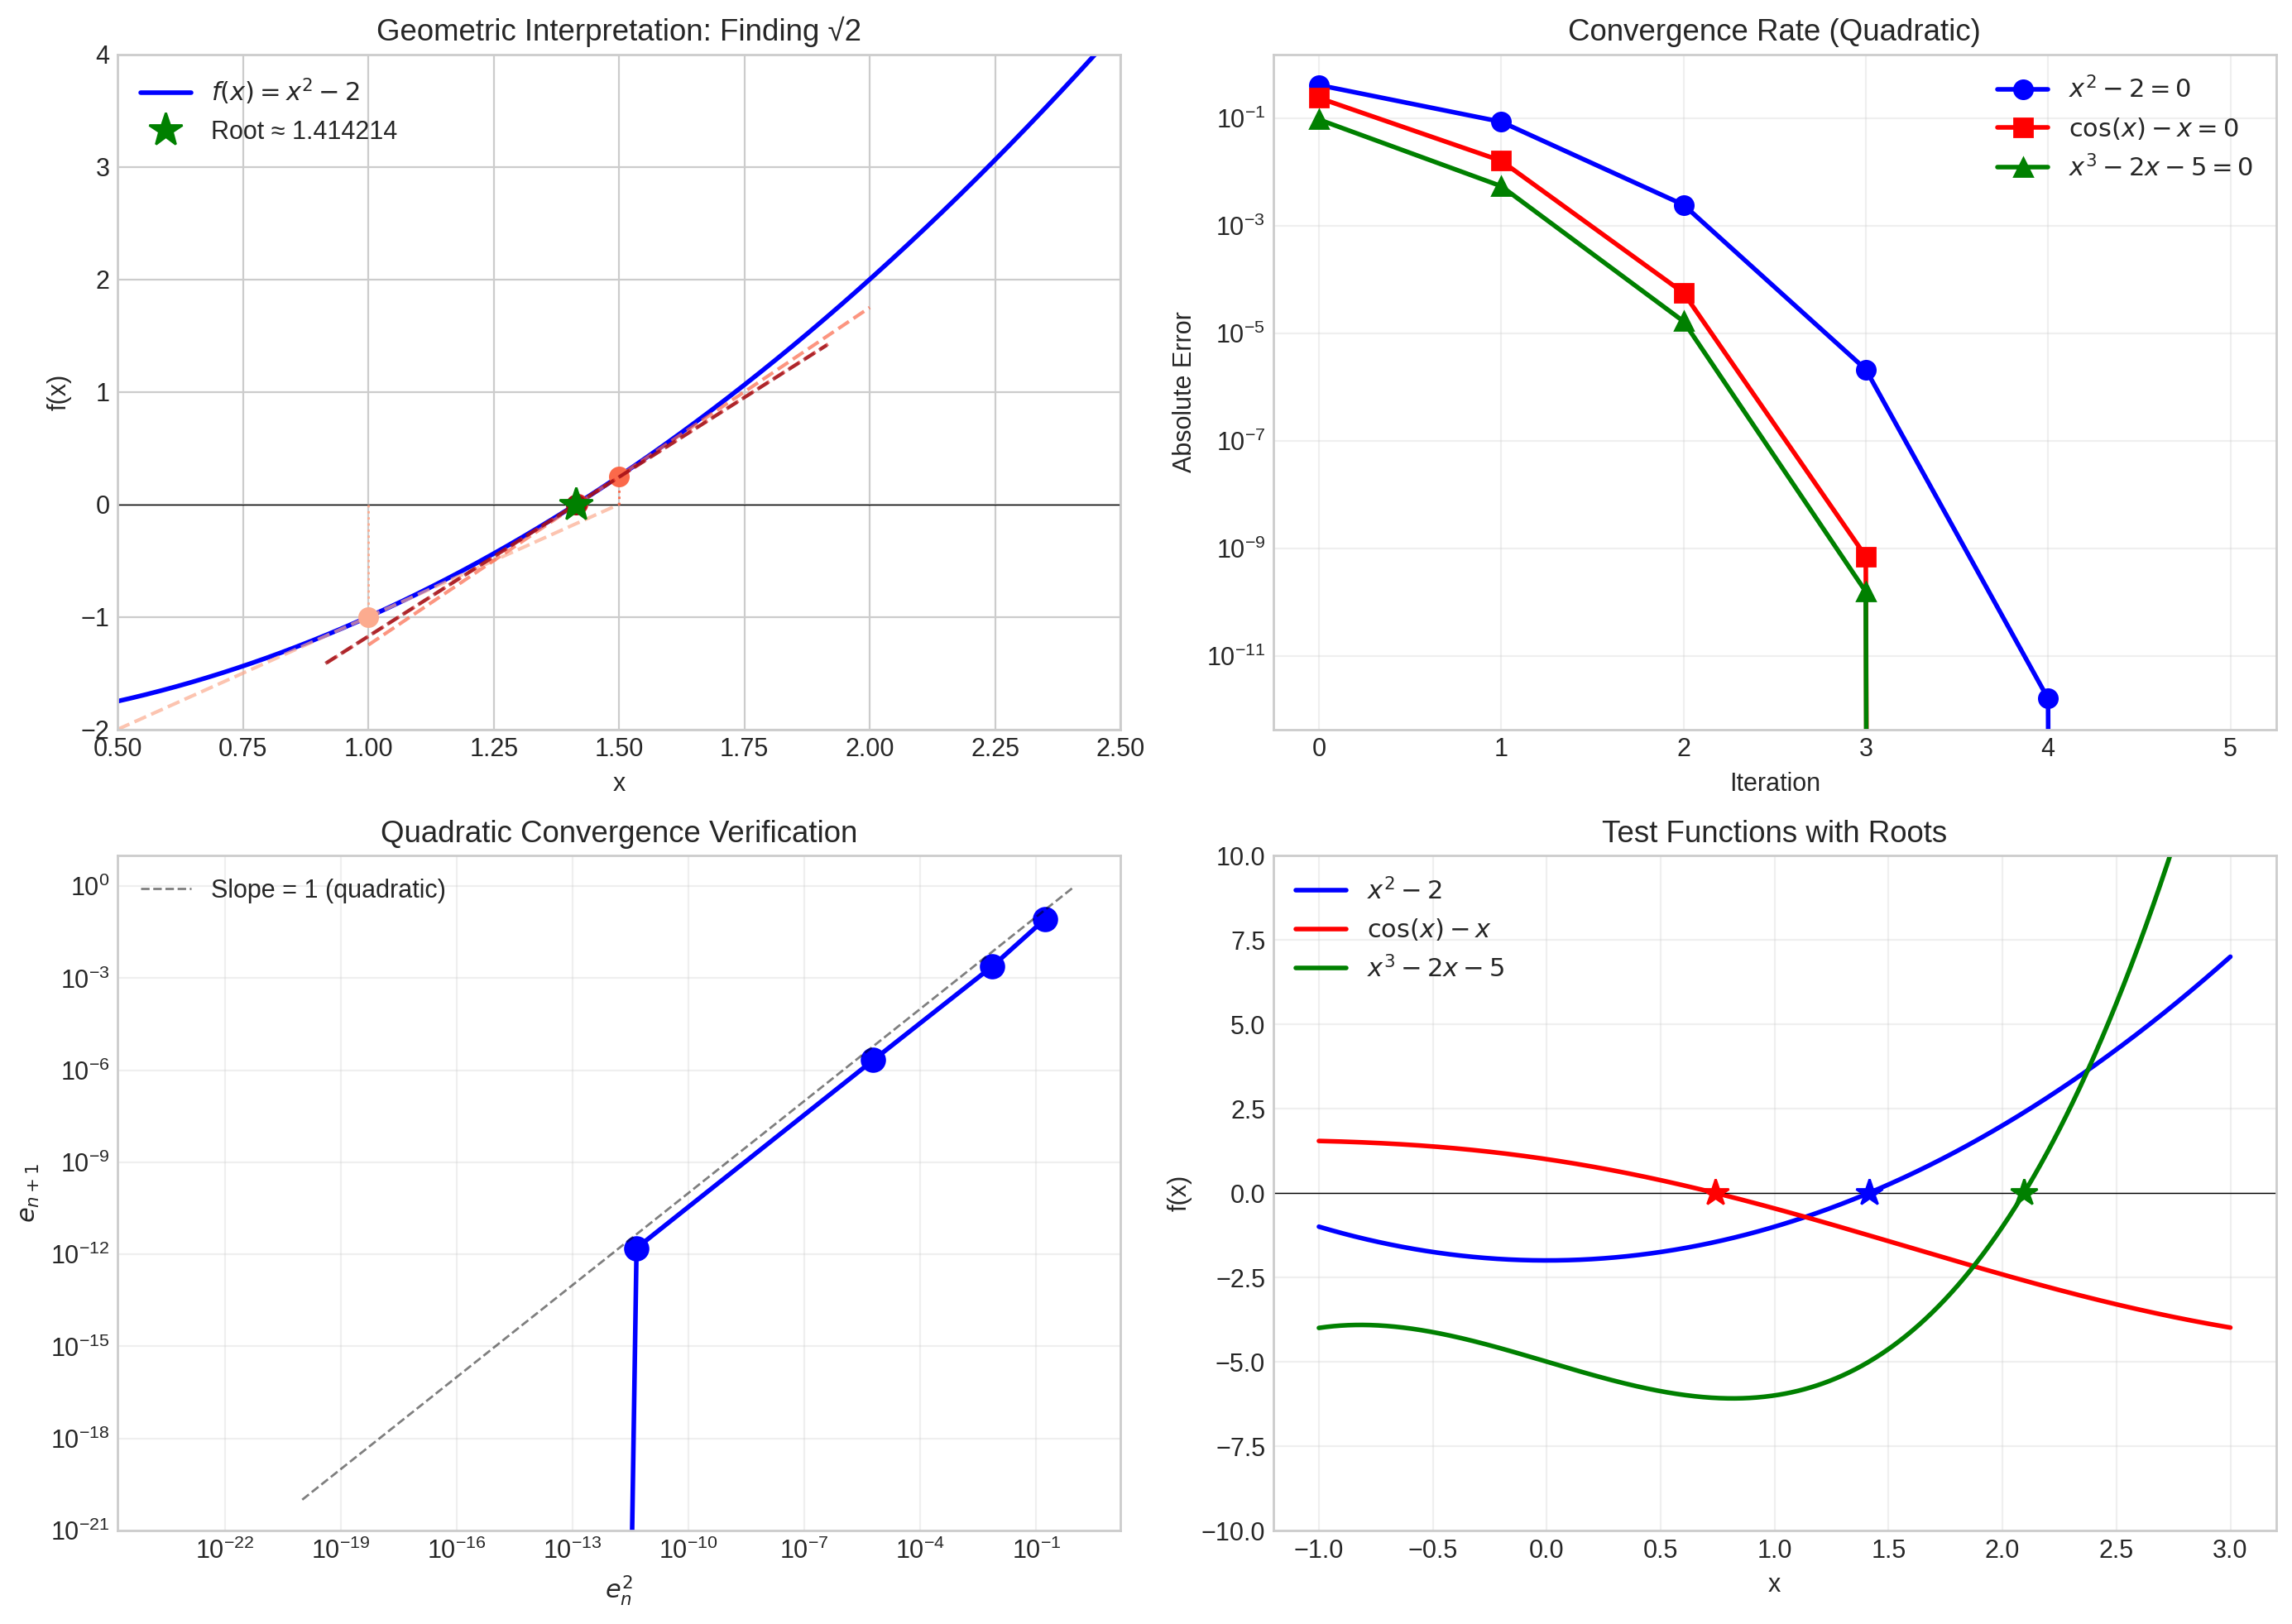


Plot saved to 'plot.png'


In [6]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Geometric interpretation for f(x) = x² - 2
ax1 = axes[0, 0]
x_plot = np.linspace(0.5, 2.5, 1000)
ax1.plot(x_plot, f1(x_plot), 'b-', linewidth=2, label=r'$f(x) = x^2 - 2$')
ax1.axhline(y=0, color='k', linewidth=0.5)

# Show tangent lines for first few iterations
colors = plt.cm.Reds(np.linspace(0.3, 0.9, min(4, len(history1)-1)))
for i in range(min(4, len(history1)-1)):
    xi = history1[i]
    yi = f1(xi)
    slope = df1(xi)
    
    # Tangent line
    x_tan = np.linspace(xi - 0.5, xi + 0.5, 100)
    y_tan = yi + slope * (x_tan - xi)
    ax1.plot(x_tan, y_tan, '--', color=colors[i], linewidth=1.5, alpha=0.7)
    
    # Mark iteration point
    ax1.plot(xi, yi, 'o', color=colors[i], markersize=8)
    ax1.plot([xi, xi], [0, yi], ':', color=colors[i], linewidth=1)

ax1.plot(root1, 0, 'g*', markersize=15, label=f'Root ≈ {root1:.6f}')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Geometric Interpretation: Finding √2')
ax1.legend(loc='upper left')
ax1.set_xlim([0.5, 2.5])
ax1.set_ylim([-2, 4])

# Plot 2: Convergence rate (error vs iteration)
ax2 = axes[0, 1]
errors1 = [abs(x - np.sqrt(2)) for x in history1]
errors2 = [abs(x - root2) for x in history2]
errors3 = [abs(x - root3) for x in history3]

ax2.semilogy(range(len(errors1)), errors1, 'bo-', linewidth=2, markersize=8, label=r'$x^2 - 2 = 0$')
ax2.semilogy(range(len(errors2)), errors2, 'rs-', linewidth=2, markersize=8, label=r'$\cos(x) - x = 0$')
ax2.semilogy(range(len(errors3)), errors3, 'g^-', linewidth=2, markersize=8, label=r'$x^3 - 2x - 5 = 0$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Absolute Error')
ax2.set_title('Convergence Rate (Quadratic)')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.3)

# Plot 3: Quadratic convergence verification
ax3 = axes[1, 0]
# Plot e_{n+1} vs e_n^2 to verify quadratic convergence
errors1_sq = np.array(errors1[:-1])**2
errors1_next = np.array(errors1[1:])

# Filter out very small errors to avoid numerical issues
mask = errors1_sq > 1e-30
if np.sum(mask) > 1:
    ax3.loglog(errors1_sq[mask], errors1_next[mask], 'bo-', linewidth=2, markersize=10)
    # Add reference line for perfect quadratic convergence
    x_ref = np.array([1e-20, 1])
    ax3.loglog(x_ref, x_ref, 'k--', linewidth=1, alpha=0.5, label='Slope = 1 (quadratic)')

ax3.set_xlabel(r'$e_n^2$')
ax3.set_ylabel(r'$e_{n+1}$')
ax3.set_title('Quadratic Convergence Verification')
ax3.legend()
ax3.grid(True, which="both", ls="-", alpha=0.3)

# Plot 4: Multiple functions overview
ax4 = axes[1, 1]
x_plot = np.linspace(-1, 3, 1000)

ax4.plot(x_plot, f1(x_plot), 'b-', linewidth=2, label=r'$x^2 - 2$')
ax4.plot(x_plot, [f2(x) for x in x_plot], 'r-', linewidth=2, label=r'$\cos(x) - x$')
ax4.plot(x_plot, f3(x_plot), 'g-', linewidth=2, label=r'$x^3 - 2x - 5$')
ax4.axhline(y=0, color='k', linewidth=0.5)

# Mark roots
ax4.plot(root1, 0, 'b*', markersize=12)
ax4.plot(root2, 0, 'r*', markersize=12)
ax4.plot(root3, 0, 'g*', markersize=12)

ax4.set_xlabel('x')
ax4.set_ylabel('f(x)')
ax4.set_title('Test Functions with Roots')
ax4.legend(loc='upper left')
ax4.set_ylim([-10, 10])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('newton_raphson_root_finding_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Potential Pitfalls

### 1. Division by Zero

When $f'(x_n) = 0$, the method fails. This occurs at stationary points of $f$.

### 2. Cycling

For some functions, the iterates can enter a cycle without converging.

### 3. Divergence

If the initial guess is too far from the root, or if the function has unfavorable curvature, the method may diverge.

### 4. Slow Convergence at Multiple Roots

For roots with multiplicity $m > 1$, convergence degrades to linear. The modified Newton method:

$$x_{n+1} = x_n - m\frac{f(x_n)}{f'(x_n)}$$

restores quadratic convergence when the multiplicity is known.

## Summary

The Newton-Raphson method is a cornerstone of numerical analysis, providing:

1. **Rapid convergence**: Quadratic convergence near simple roots
2. **Wide applicability**: Works for polynomials, transcendental equations, and systems of equations
3. **Computational efficiency**: Only requires function and derivative evaluations

**Key Formula:**

$$\boxed{x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}}$$

The method forms the basis for many advanced optimization algorithms and is essential knowledge for computational scientists and engineers.